In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install konlpy

In [ ]:
from konlpy.tag import Kkma

Kkma().pos('아버지가방에들어가신다.')

In [11]:
!pip install nltk

In [3]:
import nltk

In [4]:
import nltk

In [5]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/myoungjikim/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/myoungjikim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/myoungjikim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize, TweetTokenizer

# sent_tokenizer

In [13]:
# (문장, ...) ㅌ (문단, ...) ㅌ {문서...}
# 문장을 분리
len(corpus.splitlines()), len(sent_tokenize(corpus))
sum([len(s) for s in sent_tokenize(corpus)])/7493

116.64780461764313

In [18]:
sent_tokenize('한글에서는 어떻게 문장을 분리하는지 봅시다. 볼까요? 볼래요!')
# 문장을 구분하는 단위기호: white-space . ? ! 등으로 문장이 쪼개진다.

['한글에서는 어떻게 문장을 분리하는지 봅시다.', '볼까요?', '볼래요!']

In [22]:
data = '''
정부가 26일부터 현장에 복귀하지 않은 전공의를 대상으로 적용하기로 한 면허정지 처분을 무기한 연기할 방침이다. 
대신 정부와 의사단체 간 협의체를 구성해 의료개혁과 관련한 타협안 모색에 나선다. 
의대 교수 단체가 집단 사직을 예고한 25일을 하루 앞두고 ‘강(强) 대 강’ 대치를 이어오던 
양측이 한발씩 물러서는 모양새다.
'''

len([s for s in data.splitlines() if len(s) > 1]),len(sent_tokenize(data))

(4, 3)

In [23]:
sent_tokenize(data)

['\n정부가 26일부터 현장에 복귀하지 않은 전공의를 대상으로 적용하기로 한 면허정지 처분을 무기한 연기할 방침이다.',
 '대신 정부와 의사단체 간 협의체를 구성해 의료개혁과 관련한 타협안 모색에 나선다.',
 '의대 교수 단체가 집단 사직을 예고한 25일을 하루 앞두고 ‘강(强) 대 강’ 대치를 이어오던 \n양측이 한발씩 물러서는 모양새다.']

# word tokenizer

In [25]:
len(corpus.split()), len(word_tokenize(corpus)), \
len(set(corpus.split())), len(set(word_tokenize(corpus)))

# 화이트 스페이스로 구별 / 단어 / 화이트스페이스로 구별 후 유니크 / 단어 유니크화

(158167, 191785, 17409, 8406)

In [26]:
len(data.split()), len(word_tokenize(data)), \
len(set(data.split())), len(set(word_tokenize(data)))

(43, 51, 43, 48)

In [30]:
set(word_tokenize(data,preserve_line=True)) 

{'(',
 ')',
 '.',
 '25일을',
 '26일부터',
 '‘',
 '’',
 '强',
 '간',
 '강',
 '관련한',
 '교수',
 '구성해',
 '나선다.',
 '단체가',
 '대',
 '대상으로',
 '대신',
 '대치를',
 '면허정지',
 '모색에',
 '모양새다',
 '무기한',
 '물러서는',
 '방침이다.',
 '복귀하지',
 '사직을',
 '않은',
 '앞두고',
 '양측이',
 '연기할',
 '예고한',
 '의대',
 '의료개혁과',
 '의사단체',
 '이어오던',
 '적용하기로',
 '전공의를',
 '정부가',
 '정부와',
 '집단',
 '처분을',
 '타협안',
 '하루',
 '한',
 '한발씩',
 '현장에',
 '협의체를'}

# regexp_tokenizer

In [32]:
len(corpus.split()), len(regexp_tokenize(corpus,r'\b\w+\b')), \
len(set(corpus.split())), len(set(regexp_tokenize(corpus,r'\b\w+\b')))

(158167, 161983, 17409, 7723)

In [ ]:
일반적인 모델 구축 과정
Tokenizing => Normalizing(Stopwords...) => Feature Selection => Model

토크나이저에서 어떤 토큰을 뽑느냐에 따라, 모델의 피쳐가 달라지고 적은 모델로도 더 좋은 성능을 낼 수 있다.
보통 BERT 토크나이저를 사용하는데, 바이트 페어 인코딩을 알아야 하고, 
엔트로피, perplexity => 확률 이용
Ngram => P. Markov Assumption 을 사용한다. 

어절, 음절, 형태소를 보고 분리한다,
분리해주는 기능을 토크나이저라고 한다. 어떤 토크나이저를 사용하느냐에 따라
토크나이지으 결과가 달라진다.


In [33]:
tt = TweetTokenizer()

In [36]:
tt.tokenize(':) =()'), word_tokenize(':)')

([':)', '=(', ')'], [':', ')'])

In [37]:
len(tt.tokenize(corpus)), len(tt.tokenize(corpus))

(193228, 193228)

In [ ]:
token => 어절 음절 단어 형태소 어간 어미 어근 접사 구 품사 청크... 다 토큰이 될 수 있다.
한글일 때는 형태소 분석기를 사용하고, 추가적으로 확률을 이용한 형태소 분석기를 사용한다.

In [8]:
from nltk.text import Text

In [9]:
t = Text(word_tokenize(corpus))

NameError: name 'corpus' is not defined

In [44]:
dir(t)

['_CONTEXT_RE',
 '_COPY_TOKENS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_context',
 '_train_default_ngram_lm',
 'collocation_list',
 'collocations',
 'common_contexts',
 'concordance',
 'concordance_list',
 'count',
 'dispersion_plot',
 'findall',
 'generate',
 'index',
 'name',
 'plot',
 'readability',
 'similar',
 'tokens',
 'vocab']

In [45]:
t.count('Emma')

855

In [46]:
t.vocab().B(), t.vocab().N(), len(t.tokens)

(8406, 191785, 191785)

In [47]:
t.vocab().freq('Emma')

0.004458117162447532

In [48]:
t.vocab().most_common(50)

[(',', 12016),
 ('.', 6355),
 ('to', 5125),
 ('the', 4844),
 ('and', 4653),
 ('of', 4272),
 ('I', 3177),
 ('--', 3100),
 ('a', 3001),
 ("''", 2452),
 ('was', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('in', 2103),
 ('it', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1729),
 ('you', 1664),
 ('had', 1605),
 ('as', 1387),
 ('he', 1365),
 ('for', 1320),
 ('have', 1301),
 ('is', 1221),
 ('with', 1185),
 ('very', 1151),
 ('but', 1148),
 ('Mr.', 1091),
 ('his', 1084),
 ('!', 1063),
 ('at', 996),
 ('so', 918),
 ("'s", 866),
 ('Emma', 855),
 ('all', 831),
 ('could', 824),
 ('would', 813),
 ('been', 755),
 ('him', 748),
 ('on', 674),
 ('Mrs.', 668),
 ('any', 651),
 ('?', 621),
 ('my', 619),
 ('no', 616),
 ('Miss', 592),
 ('were', 590)]

In [51]:
t.collocations() # 가장 많이 나온 쌍

Mr. Knightley; Mrs. Weston; Frank Churchill; Mr. Elton; Miss
Woodhouse; Miss Bates; Mrs. Elton; Miss Fairfax; Mr. Weston; Jane
Fairfax; every thing; Mr. Woodhouse; every body; young man; great
deal; dare say; Maple Grove; Mrs. Goddard; John Knightley; Miss Smith


In [52]:
t.count('Weston')

429

In [53]:
t.concordance('Emma')

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

/Users/myoungjikim/2024_Korea_iisw/myvenv2/lib/python3.11/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


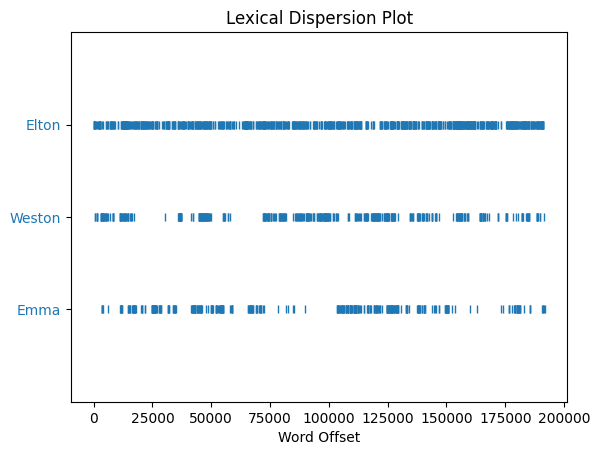

In [54]:
t.dispersion_plot(['Emma', 'Weston', 'Elton'])

In [55]:
t.similar('Emma') # 언어습관을 분석할 때 이런 메서드를 사용한다. 

she it he i weston you her harriet elton him me knightley jane that
and the all there they them


In [ ]:
from nltk.collocations import BigramAssocMeasures

BigramAssocMeasures().

In [ ]:
collocation(연어), co-ocurence(공기어)
-> 이웃한 패턴       -> 같이 자주 나오는 표현 (꼭 바로 옆에 붙어있지 않음)

In [56]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [58]:
bigram = BigramCollocationFinder.from_words(word_tokenize(corpus))

In [60]:
bigram.nbest(BigramAssocMeasures.chi_sq,10)

[('&', 'c.'),
 ('10,000', 'l.'),
 ('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis")]

In [61]:
bigram.nbest(BigramAssocMeasures.pmi,10)

[('26th', 'ult.'),
 ('Abominable', 'scoundrel'),
 ('Agricultural', 'Reports'),
 ('Austen', '1816'),
 ('Baronne', "d'Almane"),
 ('Candles', 'everywhere.'),
 ('Clayton', 'Park'),
 ('Comtesse', "d'Ostalis"),
 ('DEAR', 'MADAM'),
 ('Farmer', 'Mitchell')]

# Ngram
- 자연어 처리 모델의 일종
- 종류:  Bi_gram, tri_gram, quad_gram, n_gram

In [62]:
print(data) 


정부가 26일부터 현장에 복귀하지 않은 전공의를 대상으로 적용하기로 한 면허정지 처분을 무기한 연기할 방침이다. 
대신 정부와 의사단체 간 협의체를 구성해 의료개혁과 관련한 타협안 모색에 나선다. 
의대 교수 단체가 집단 사직을 예고한 25일을 하루 앞두고 ‘강(强) 대 강’ 대치를 이어오던 
양측이 한발씩 물러서는 모양새다.



In [63]:
P(의과대학|정부의)
P(정원|정부의, 의과대학)
P(증원에|정부의, 의과대학, 정원) ~ P(증원에|정원, 예산)
                            P(정원,예산,증원에)/P(정원,예산) = 0
                            P(증원에|예산) => P(예산,증원에)/P(예산)
                            count(예산, 증원에)/N / count(예산)/N
                            count(예산, 증원에)/ count(예산) 
P(F|A,B,C,D,E)
Bigram => Markov 1st Assumption
Trigram => Markov 2nd Assumption

S => A,B,C,D ....Z
P(S) => P(Z|A,...Y)P(A,...Y)
     => P(Z|Y)P(Y|X)P(X|W)

우리는 모든 데이터 셋을 얻을 수 없다.
모은 데이터로 최대한 추측해볼 수 밖에 없다. 
그래서 복잡한 모델 보다 간단한 모델을 선호한다.

지금 본 모델은 가장 단순한 모델이다. 

SyntaxError: invalid decimal literal (1957442510.py, line 9)

# Ngram

In [68]:
def ngram(text, n=2):
    result = list()
    for i in range(len(text)-(n-1)):
        result.append(''.join(text[i:i+n]))
    return result

ngram('의대 교수 줄사직 시작댔다.'.split())

['의대교수', '교수줄사직', '줄사직시작댔다.']

In [69]:
bigram = ngram(word_tokenize(corpus))
unigram = ngram(word_tokenize(corpus),1)

In [70]:
bigramText = Text(bigram)
unigramText = Text(unigram)

In [71]:
unigramText.count('Emma'), unigramText.vocab().N(), \
unigramText.count('Emma')/unigramText.vocab().N(), unigramText.vocab().freq('Emma')

(855, 191785, 0.004458117162447532, 0.004458117162447532)

In [1]:
import re

def findToken(k, t):
    result = list()
    for token in t:
        if re.match(k, token):
            result.append(token)
    return result

for k in findToken('Emma', bigramText.tokens):
    print(k, bigramText.count(k)/unigramText.count('Emma'))

# nextword = {k:bigramText.count(k)/unigramText.count('Emma')
#  for k in findToken('Emma', bigramText.tokens)}


NameError: name 'bigramText' is not defined

In [76]:
sorted(nextword.items(), key=lambda r:r[1], reverse=True)[:5]

[('Emma,', 0.21403508771929824),
 ("Emma's", 0.08654970760233918),
 ('Emmawas', 0.07485380116959064),
 ('Emmacould', 0.07134502923976609),
 ('Emma.', 0.05847953216374269)]

In [ ]:
자동으로 띄어쓰기 해주는 모델을 만들어볼 수 있다. -> 내일

형태소 분석기가 필요한 이유: 형태는 다르지만, 같은 의미를 지닌 단어들이 있다. 

# 놀라야 하는 포인트
## t.collocation => NER
## t.similar
## bigram 

# TFIDF ? 